In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import io
import requests
import os
from data_utilities import *

from random import randint
from time import sleep
from tqdm import tqdm 

### TODO 
- newconect  https://newconnect.pl/notowania  <b> DONE </b>
- wig20 
- CSVki <b>DONE</b>

### INSTRUCTION 
 All usefull funtions are contained in file data_utilities.py. They allow for downloading and minpulating data form stooq.pl:
 - get_stock_names - reads stock's names from files in <b>"names_data"</b> directory 
 - download_stock_data - downloads data for stock with given names
 - download_multi_stock - downloads data for multiple stocks
 - to_one_csv - creates one dataframe from data in given directorty 


In [6]:
### files fith stock's names to chose (main stocks or NC)
file_names = os.listdir("names_data")
for ii, nn in enumerate(file_names):
    print(f"set N to {ii} for {nn} data")

set N to 0 for main.tsv data
set N to 1 for NC.tsv data


In [3]:
N = 0
### get names 
names = get_stock_names(file = file_names[N])["Skrót"]
names = np.array(names)[:]
### read data
download_multi_stock(names, save_stats = True, save_dir = f"{file_names[0][:-4]}_data")


100%|██████████| 396/396 [12:44<00:00,  1.93s/it]


,Data,Name
0,1997-06-12,06N
1,2010-10-28,11B
2,2010-11-30,4FM
3,2006-09-21,ABE
4,2011-08-11,ACG
...,...,...
391,2012-10-30,ZEP
392,1999-08-03,PUE
393,2008-04-25,ZRE
394,2010-10-01,ZUE


# Examples

### creates once data frame| form all stocks in directory 

In [ ]:
### merges all stock data in given directory into one data_frame 
df = to_one_csv(directory = "HERE_PUT_NAME_OF_DIRECTORY")

### saves this data_frame as a .tsv file
df.to_csv("main_stock.tsv", sep = "\t")

### Example how to download one stock data and plot it

<AxesSubplot:xlabel='Data'>

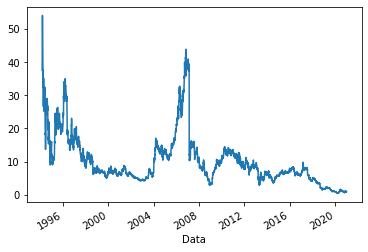

In [5]:
## downloads the data
data = download_stock_data("RFK", save = False)

## change type of values to time (not sure if neccecery)
data["Data"] = pd.to_datetime(data["Data"], dayfirst=True)
data = data.set_index('Data')
data["Zamkniecie"].plot()

<AxesSubplot:xlabel='Data'>

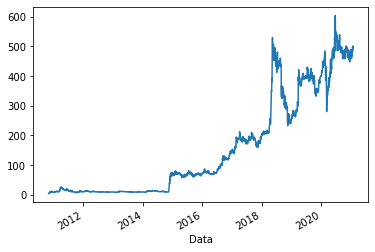

In [2]:
### Example how to read data from file 
data = pd.read_csv("main_data/11B.tsv", sep = "\t", index_col = 0)
data["Data"] = pd.to_datetime(data["Data"]) ## i guess i  dont need it dayfirst=True
data = data.set_index('Data')
data["Zamkniecie"].plot()

In [3]:
data.loc[:,]

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
Data,,,,,
2010-10-28,3.75,4.18,3.40,3.95,207981
2010-10-29,4.25,5.35,3.80,5.14,275534
2010-11-02,5.45,5.99,4.82,4.86,118863
2010-11-03,4.74,5.02,4.00,4.36,86129
2010-11-04,4.40,4.65,4.30,4.35,16078
...,...,...,...,...,...
2021-01-25,490.00,498.00,486.50,496.50,7409
2021-01-26,496.00,497.50,487.00,495.00,9855
2021-01-27,491.00,506.00,490.00,501.00,9345
